In [ ]:

import pandas as pd
# DataFrame을 컨트롤하는 라이브러리

import warnings, os, time, shutil, urllib, random
# warnings : 파이썬 경고 제어
# os : 경로 또는 파일 제어
# time : 시간 제어(일정시간 delay등)
# shutil : os의 폴더 제어(생성/삭제)
# urlib : 특정 url에서 이미지를 받을때 사용

warnings.filterwarnings(action='ignore')
# 파이썬에서 불필요한 warning은 안뜨게 함

from PIL import Image
# 파이썬에서 이미지를 다룰때 사용(png등을 불러들여서 리사이즈 저장 등)

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument("--ignore-local-proxy")

# Keys.ARROW_DOWN , Keys.ARROW_LEFT , Keys.ARROW_RIGHT, Keys.ARROW_UP , Keys.BACK_SPACE , Keys.CONTROL, Keys.ALT , Keys.DELETE , 
# Keys.ENTER , Keys.SHIFT, Keys.SPACE , Keys.TAB , Keys.EQUALS , Keys.ESCAPE, Keys.HOME , Keys.INSERT , PgUp Key,  Keys.PAGE_UP,
# Keys.PAGE_DOWN , Keys.F1 , Keys.F2 , Keys.F3 , Keys.F4, Keys.F5 , Keys.F6 , Keys.F7 , Keys.F8 , Keys.F9 , Keys.F10, Keys.F11 , Keys.F12
from selenium.webdriver.common.keys import Keys

try:
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)
except:
    driver = webdriver.Chrome()


In [2]:
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# 데이터를 저장할 리스트
data = []

# 총 페이지 수만큼 반복
for idx2 in range(1, 501):  # 1~500 페이지
    # 각 페이지에서 스크롤하여 제목을 추출
    for idx in range(1, 11):  # 페이지 내에서 10개의 항목
        try:
            # xpath로 해당 요소를 찾아 제목 추출
            title_elem = driver.find_element("xpath", f"/html/body/div[1]/main/div[1]/div[2]/div/div[2]/div[2]/div/div[2]/div[3]/div[5]/div[{str(idx)}]/div/div[2]/a/div/strong/span")
            title = title_elem.text

            # 날짜 추출
            date_elem = driver.find_element("xpath", f"/html/body/div[1]/main/div[1]/div[2]/div/div[2]/div[2]/div/div[2]/div[3]/div[5]/div[{str(idx)}]/div/div[2]/div/p[1]")
            date = date_elem.text

            # 데이터를 리스트에 추가
            data.append([idx2, idx, title, date])

            # 제목과 날짜 출력
            print(f"Page {idx2}, Item {idx}: {title}, Date: {date}")
        except Exception as e:
            print(f"Error extracting item {idx} on page {idx2}: {str(e)}")
            continue
    
    # 페이지가 완전히 로드되도록 잠시 대기
    time.sleep(2)
    
    # 다음 페이지 버튼 클릭을 위한 처리
    try:
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, "a.page-next.page-link"))
        )
        # 스크롤하여 버튼 노출 후 클릭
        driver.execute_script("arguments[0].scrollIntoView(true);", next_button)
        driver.execute_script("arguments[0].click();", next_button)
    except Exception as e:
        print(f"Error navigating to next page (page {idx2}): {str(e)}")
        break  # 다음 페이지 버튼이 없으면 반복 종료
    
    # 페이지가 전환될 시간을 줍니다.
    time.sleep(3)

# 데이터프레임 생성
df = pd.DataFrame(data, columns=["Page", "Item", "Title", "Date"])

# CSV 파일로 저장
df.to_csv("news_titles_and_dates.csv", index=False)

print("크롤링한 데이터를 CSV 파일로 저장했습니다.")


Page 1, Item 1: 강원 최대 210㎜ 폭우…고립되고 무너지고 피해 속출, Date: 2024/09/21
Page 1, Item 2: 가을 폭우에 침수·나무 쓰러짐 피해… 빗길 교통사고도 잇따라, Date: 2024/09/20
Page 1, Item 3: [속보] 강원 호우특보 발효… 비 피해 속출, Date: 2024/09/20
Page 1, Item 4: 요란한 가을비…호우특보 발령된 강원 피해 속출, Date: 2024/09/20
Page 1, Item 5: “가을손님 맞는다”…볼거리·놀거리 늘린 홍천, Date: 2024/09/20
Page 1, Item 6: 홍천군, 올해 출산한 산모에 산후조리 비용 지원, Date: 2024/09/20
Page 1, Item 7: 홍천군, ‘아이 먼저’ 교통안전 캠페인 실시, Date: 2024/09/20
Page 1, Item 8: 홍천 주민을 위한 판소리 한마당 “얼쑤” 21일 열려, Date: 2024/09/20
Page 1, Item 9: 홍천군, 산후조리 비용 지원, Date: 2024/09/20
Page 1, Item 10: 홍천군, 군민을 위한 ‘한국 전통 판소리 대공연’ 개최, Date: 2024/09/20
Page 2, Item 1: 홍천군, 귀농·귀촌인 지역민과 함께하는 나눔 한마당, Date: 2024/09/20
Page 2, Item 2: 홍천군 청년창업지원센터, 청년의 날 ‘청년창업 공유마당’ 개최, Date: 2024/09/20
Page 2, Item 3: "이러다 반도체 시설 못 돌리겠네"...전력 인프라 깔기 어려운 까닭은, Date: 2024/09/20
Page 2, Item 4: [뉴스 플러스+] 11년 표류 끝 본궤도 안착… 갈등 봉합·탄탄한 전략 관건, Date: 2024/09/20
Page 2, Item 5: 홍천 영귀미면 '홍천 숲속 놀이공원' 명칭 확정, Date: 2024/09/20
Page 2, Item 6: [피플&피플] 강원도사회공헌장 받은 평창한우마을 영농조

In [3]:
df=pd.read_csv("news_titles_and_dates.csv")
df

,Page,Item,Title,Date
0,1,1,강원 최대 210㎜ 폭우…고립되고 무너지고 피해 속출,2024/09/21
1,1,2,가을 폭우에 침수·나무 쓰러짐 피해… 빗길 교통사고도 잇따라,2024/09/20
2,1,3,[속보] 강원 호우특보 발효… 비 피해 속출,2024/09/20
3,1,4,요란한 가을비…호우특보 발령된 강원 피해 속출,2024/09/20
4,1,5,“가을손님 맞는다”…볼거리·놀거리 늘린 홍천,2024/09/20
...,...,...,...,...
1731,181,4,"GS칼텍스, 다문화 교육기관 해밀학교에 후원금 1억원 전달",2024/06/21
1732,182,1,"GS칼텍스, 해밀학교에 1억원",2024/06/21
1733,182,2,양양 동산항 인근 바다에 빠진 60대 심정지,2024/06/21
1734,182,3,홍천공대협 오늘 지역 난개발 전면 중단 기자회견,2024/06/21


[('홍천군,', 281), ('홍천', 201), ('홍천군', 121), ('강원', 102), ('[포토뉴스]', 74), ('개최', 64), ('2024년', 54), ('실시', 35), ('신영재', 33), ('홍천서', 32)]


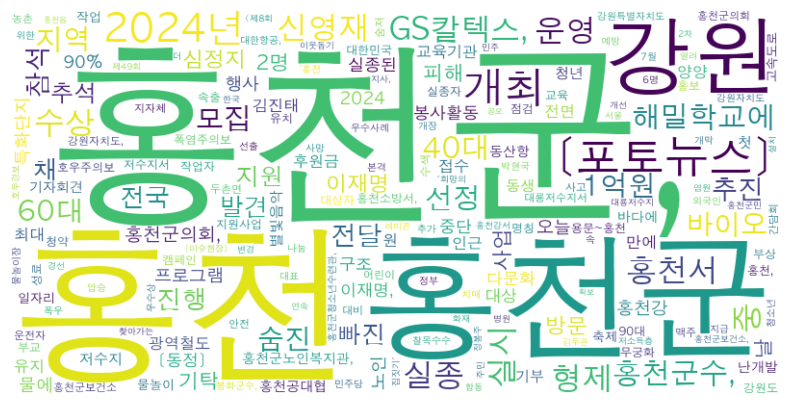

In [7]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 외부 파일에서 한국어 불용어 목록을 읽어옴
with open("stopwords-ko.txt", "r", encoding="utf-8") as file:
    stop_words = set(file.read().splitlines())

# CSV 파일에서 데이터를 불러옵니다.
df = pd.read_csv("news_titles_and_dates.csv")

# 뉴스 제목을 리스트로 변환
titles = df['Title'].tolist()

# 단어들을 저장할 리스트
words = []

# 제목에서 단어 추출
for title in titles:
    # 공백을 기준으로 단어를 분리하고, 불용어를 제외한 단어들만 추가
    for word in title.split():
        if word not in stop_words:
            words.append(word)

# 가장 많이 등장하는 단어 10개 출력
word_freq = Counter(words)
print(word_freq.most_common(10))

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[('홍천군,', 281), ('홍천', 201), ('홍천군', 121), ('강원', 102), ('[포토뉴스]', 74), ('개최', 64), ('2024년', 54), ('실시', 35), ('신영재', 33), ('홍천서', 32)]


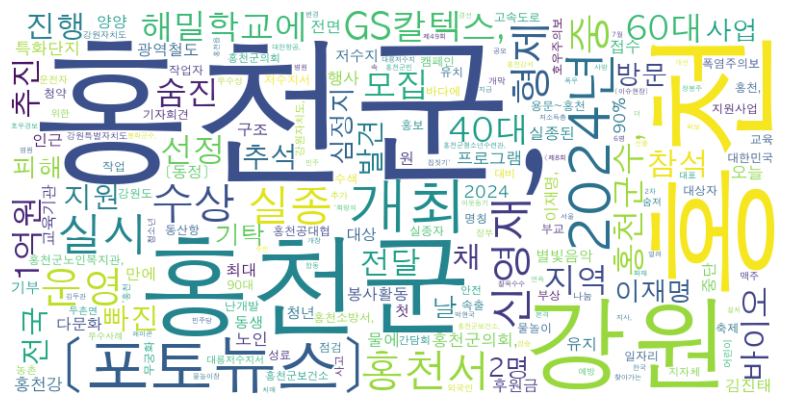

In [8]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 외부 파일에서 한국어 불용어 목록을 읽어옴
with open("stopwords-ko.txt", "r", encoding="utf-8") as file:
    stop_words = set(file.read().splitlines())

# 추가로 제거할 특정 단어 리스트
remove_words = {"세종시","세종시,", "세종", "충청권"}

# CSV 파일에서 데이터를 불러옵니다.
df = pd.read_csv("news_titles_and_dates.csv")

# 뉴스 제목을 리스트로 변환
titles = df['Title'].tolist()

# 단어들을 저장할 리스트
words = []

# 제목에서 단어 추출
for title in titles:
    # 공백을 기준으로 단어를 분리하고, 불용어와 제거할 단어를 제외한 단어들만 추가
    for word in title.split():
        if word not in stop_words and word not in remove_words:
            words.append(word)

# 가장 많이 등장하는 단어 10개 출력
word_freq = Counter(words)
print(word_freq.most_common(10))

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[('실종', 31), ('40대', 29), ('숨진', 27), ('심정지', 20), ('피해', 19), ('노인', 18), ('홍천강', 17), ('물에', 17), ('특화단지', 17), ('[동정]', 16), ('대상', 16), ('실종된', 16), ('봉사활동', 16), ('중단', 16), ('구조', 16), ('이재명,', 16), ('90%', 16), ('다문화', 16), ('최대', 15), ('접수', 15), ('양양', 15), ('김진태', 15), ('유지', 15), ('광역철도', 15), ('원', 15), ('만에', 15), ('전면', 15), ('후원금', 15), ('인근', 15), ('교육기관', 15), ('첫', 14), ('기부', 14), ('청년', 14), ('저수지', 14), ('동생', 14), ('별빛음악', 14), ('홍천군노인복지관,', 14), ('동산항', 14), ('바다에', 14), ('홍천공대협', 14), ('난개발', 14), ('기자회견', 14), ('축제', 13), ('일자리', 13), ('작업', 13), ('고속도로', 13), ('물놀이', 13), ('캠페인', 12), ('유치', 12), ('부상', 12)]


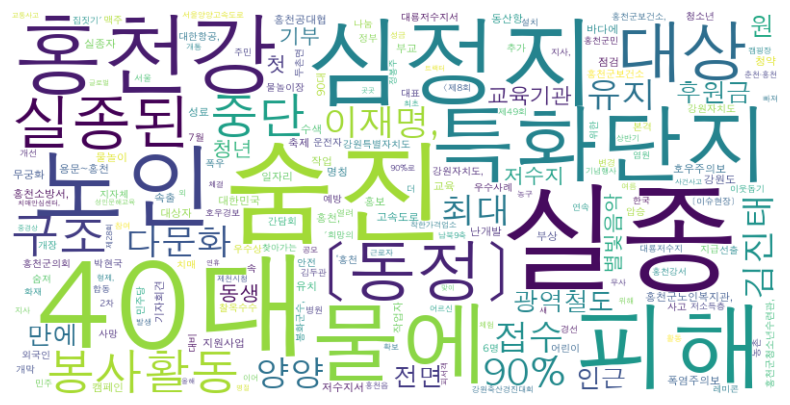

In [25]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 외부 파일에서 한국어 불용어 목록을 읽어옴
with open("stopwords-ko.txt", "r", encoding="utf-8") as file:
    stop_words = set(file.read().splitlines())

# 추가로 제거할 특정 단어 리스트
remove_words = {"홍천군","홍천군,","강원","홍천","2024년","[포토뉴스]","실시","신영재","운영","형제","중","홍천서",
                "지역","모집","추석","채","홍천군수","선정","GS칼텍스","개최","수상","바이오","GS칼텍스,","진행","1억원","홍천군수,",
                "40대,","60대","추진","전달","참석","전국","지원","40대,","빠진","발견","사업","방문","이재명","날","기탁","2명","홍천군의회,",
                "행사","오늘","프로그램","2024","해밀학교에"}

# CSV 파일에서 데이터를 불러옵니다.
df = pd.read_csv("news_titles_and_dates.csv")

# 뉴스 제목을 리스트로 변환
titles = df['Title'].tolist()

# 단어들을 저장할 리스트
words = []

# 제목에서 단어 추출
for title in titles:
    # 공백을 기준으로 단어를 분리하고, 불용어와 제거할 단어를 제외한 단어들만 추가
    for word in title.split():
        if word not in stop_words and word not in remove_words:
            words.append(word)

# 가장 많이 등장하는 단어 10개 출력
word_freq = Counter(words)
print(word_freq.most_common(50))

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
word_freq

Counter({'개최': 64,
         '수상': 31,
         '실종': 31,
         'GS칼텍스,': 30,
         '홍천군수,': 29,
         '40대': 29,
         '해밀학교에': 29,
         '지역': 28,
         '모집': 28,
         '60대': 28,
         '선정': 28,
         '1억원': 28,
         '바이오': 27,
         '숨진': 27,
         '추진': 26,
         '전달': 26,
         '참석': 26,
         '전국': 25,
         '진행': 25,
         '채': 25,
         '지원': 24,
         '빠진': 24,
         '발견': 24,
         '추석': 23,
         '사업': 20,
         '방문': 20,
         '심정지': 20,
         '이재명': 20,
         '피해': 19,
         '날': 19,
         '기탁': 19,
         '2명': 19,
         '홍천군의회,': 19,
         '행사': 18,
         '오늘': 18,
         '노인': 18,
         '프로그램': 18,
         '2024': 17,
         '홍천강': 17,
         '물에': 17,
         '특화단지': 17,
         '[동정]': 16,
         '대상': 16,
         '실종된': 16,
         '봉사활동': 16,
         '중단': 16,
         '구조': 16,
         '이재명,': 16,
         '90%': 16,
         '다문화': 16,
         '최대': 1